#How you are calculation the loss in cost ---> loss function  e.g. mean-squared_error
#what are you doing to reduce the error or gain more loss ---> optimizers e.g. sgd


In [2]:
import math
import numpy as np
import scipy as sc
import pandas as pd
math.e

2.718281828459045

In [8]:
math.pow(math.e,10)

22026.465794806703

In [11]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [27]:
np.random.seed(100)
np.random.randint(10033)

5640

In [47]:
str="sonus"
print str[::-2]

sns


In [53]:
pd.Series(data=[2,3],index=['a','b'])

a    2
b    3
dtype: int64

In [61]:
df=pd.DataFrame(np.random.randn(5,4),['A','B','C','D','E'],['X','Y','Z','Z+'])

In [62]:
df['Z+']

A   -0.415847
B    1.525180
C   -0.886748
D    0.959657
E    0.373661
Name: Z+, dtype: float64

In [63]:
!ls

Artificial_Neural_Networks Untitled.ipynb


In [64]:
!cd Artificial_Neural_Networks/

In [65]:
!ls

Artificial_Neural_Networks Untitled.ipynb


In [3]:
df=pd.read_csv('Artificial_Neural_Networks/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:,3:13].values
Y = df.iloc[:,13].values

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [21]:
X_train.size

82500

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X1 = LabelEncoder()
labelEncoder_X2 = LabelEncoder()

In [13]:
X[:,1] = labelEncoder_X1.fit_transform(X[:,1])
X[:,2] = labelEncoder_X2.fit_transform(X[:,2])
print X

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [14]:
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()
print X

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [15]:
X = X[:,1:]
print X

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [18]:
print X.shape
from sklearn.preprocessing import StandardScaler
standardScalar = StandardScaler()

(10000, 11)


In [19]:
X_train = standardScalar.fit_transform(X_train)
X_test = standardScalar.fit_transform(X_test)

ValueError: could not convert string to float: Male

In [17]:
X_test

array([[693, 'Spain', 'Female', ..., 1, 1, 26589.56],
       [718, 'Germany', 'Female', ..., 1, 1, 190746.38],
       [637, 'France', 'Female', ..., 0, 0, 175072.47],
       ...,
       [600, 'Germany', 'Female', ..., 1, 1, 96051.1],
       [531, 'Spain', 'Male', ..., 0, 0, 99503.19],
       [576, 'France', 'Female', ..., 0, 0, 148477.57]], dtype=object)

In [166]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [167]:
classifier = Sequential()

In [168]:
classifier.add(Dense(6,activation='relu',kernel_initializer='uniform',input_dim=11))

In [169]:
classifier.add(Dense(6,activation='relu',kernel_initializer='uniform'))

In [170]:
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))

In [171]:
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
X_train.size

82500

In [172]:
classifier.fit(X_train,Y_train,batch_size=10,epochs=10)

Epoch 1/10
7500/7500 [==============================] - 1s 158us/step - loss: 0.4867 - acc: 0.7927
Epoch 2/10
7500/7500 [==============================] - 1s 118us/step - loss: 0.4291 - acc: 0.7953
Epoch 3/10
7500/7500 [==============================] - 1s 119us/step - loss: 0.4212 - acc: 0.8251
Epoch 4/10
7500/7500 [==============================] - 1s 120us/step - loss: 0.4157 - acc: 0.8305
Epoch 5/10
7500/7500 [==============================] - 1s 120us/step - loss: 0.4125 - acc: 0.8321
Epoch 6/10
7500/7500 [==============================] - 1s 120us/step - loss: 0.4101 - acc: 0.8301
Epoch 7/10
7500/7500 [==============================] - 1s 121us/step - loss: 0.4084 - acc: 0.8319
Epoch 8/10
7500/7500 [==============================] - 1s 119us/step - loss: 0.4063 - acc: 0.8325
Epoch 9/10
7500/7500 [==============================] - 1s 121us/step - loss: 0.4052 - acc: 0.8328
Epoch 10/10
7500/7500 [==============================] - 1s 122us/step - loss: 0.4042 - acc: 0.8331


In [173]:
y_pred=classifier.predict(X_test)

In [179]:
y_pred = (y_pred>=0.5)

In [176]:
from sklearn.metrics import confusion_matrix

In [180]:
cm= confusion_matrix(Y_test,y_pred)

In [181]:
cm

array([[1951,   67],
       [ 316,  166]])

In [238]:
test=[600,'France','Male',40,3,60000,2,1,1,50000]
test[1]

'France'

In [239]:
test[1]=labelEncoder_X1.transform([test[1]])

In [240]:
test

[600, array([0]), 'Male', 40, 3, 60000, 2, 1, 1, 50000]

In [241]:
test[2]=labelEncoder_X2.transform([test[2]])

In [242]:
test

[600, array([0]), array([1]), 40, 3, 60000, 2, 1, 1, 50000]

In [243]:
test=onehotencoder.transform([test]).toarray()

In [244]:
test

array([[1.e+00, 0.e+00, 0.e+00, 6.e+02, 1.e+00, 4.e+01, 3.e+00, 6.e+04,
        2.e+00, 1.e+00, 1.e+00, 5.e+04]])

In [245]:
test = [round(x,2) for x in test[0]]

In [246]:
test

[1.0, 0.0, 0.0, 600.0, 1.0, 40.0, 3.0, 60000.0, 2.0, 1.0, 1.0, 50000.0]

In [247]:
test = test[1:]

In [248]:
test 

[0.0, 0.0, 600.0, 1.0, 40.0, 3.0, 60000.0, 2.0, 1.0, 1.0, 50000.0]

In [250]:
test = standardScalar.transform([test])

In [254]:
test[0].shape

(11,)

In [256]:
y_pred1 = classifier.predict(np.array(test))

In [259]:
y_pred1 = (y_pred1 >= 0.5)

In [260]:
y_pred1

array([[False]])

In [298]:
from keras.wrappers.scikit_learn import KerasClassifier
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


In [299]:
classifier = KerasClassifier(build_fn=build_classifier)

In [300]:
from sklearn.model_selection import GridSearchCV

In [301]:
parameters = {'batch_size': [10, 20],
              'epochs': [50, 100],
              'optimizer': ['adam', 'rmsprop']}

In [302]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

In [303]:
grid_search.fit(X_train,Y_train)

Epoch 1/50
6750/6750 [==============================] - 1s 173us/step - loss: 0.5004 - acc: 0.7905
Epoch 2/50
6750/6750 [==============================] - 1s 133us/step - loss: 0.4371 - acc: 0.7910 0s - loss: 0.4407 - acc: 0
Epoch 3/50
6750/6750 [==============================] - 1s 132us/step - loss: 0.4315 - acc: 0.7910
Epoch 4/50
6750/6750 [==============================] - 1s 129us/step - loss: 0.4273 - acc: 0.8086
Epoch 5/50
6750/6750 [==============================] - 1s 130us/step - loss: 0.4251 - acc: 0.8210 0s - loss: 0.4307 - a
Epoch 6/50
6750/6750 [==============================] - 1s 133us/step - loss: 0.4231 - acc: 0.8259
Epoch 7/50
6750/6750 [==============================] - 1s 132us/step - loss: 0.4216 - acc: 0.8277
Epoch 8/50
6750/6750 [==============================] - 1s 131us/step - loss: 0.4204 - acc: 0.8270
Epoch 9/50
6750/6750 [==============================] - 1s 130us/step - loss: 0.4192 - acc: 0.8295
Epoch 10/50
6750/6750 [==============================] - 1s 

6750/6750 [==============================] - 1s 132us/step - loss: 0.4153 - acc: 0.8304 0s - loss: 0.4153 - acc: 0.83
Epoch 12/50
6750/6750 [==============================] - 1s 144us/step - loss: 0.4147 - acc: 0.8320
Epoch 13/50
6750/6750 [==============================] - 1s 138us/step - loss: 0.4138 - acc: 0.8310
Epoch 14/50
6750/6750 [==============================] - 1s 144us/step - loss: 0.4131 - acc: 0.8316 0s - loss: 0.4147
Epoch 15/50
6750/6750 [==============================] - 1s 149us/step - loss: 0.4128 - acc: 0.8321
Epoch 16/50
6750/6750 [==============================] - 1s 145us/step - loss: 0.4116 - acc: 0.8333 0s - loss: 0.4003 - a
Epoch 17/50
6750/6750 [==============================] - 1s 144us/step - loss: 0.4115 - acc: 0.8314
Epoch 18/50
6750/6750 [==============================] - 1s 139us/step - loss: 0.4111 - acc: 0.8320
Epoch 19/50
6750/6750 [==============================] - 1s 141us/step - loss: 0.4110 - acc: 0.8313
Epoch 20/50
6750/6750 [===================

6750/6750 [==============================] - 1s 159us/step - loss: 0.4094 - acc: 0.8308
Epoch 20/50
6750/6750 [==============================] - 1s 157us/step - loss: 0.4093 - acc: 0.8323
Epoch 21/50
6750/6750 [==============================] - 1s 146us/step - loss: 0.4088 - acc: 0.8311
Epoch 22/50
6750/6750 [==============================] - 1s 151us/step - loss: 0.4088 - acc: 0.8299
Epoch 23/50
6750/6750 [==============================] - 1s 145us/step - loss: 0.4086 - acc: 0.8311
Epoch 24/50
6750/6750 [==============================] - 1s 147us/step - loss: 0.4083 - acc: 0.8310
Epoch 25/50
6750/6750 [==============================] - 1s 149us/step - loss: 0.4082 - acc: 0.8307
Epoch 26/50
6750/6750 [==============================] - 1s 146us/step - loss: 0.4081 - acc: 0.8310
Epoch 27/50
6750/6750 [==============================] - 1s 150us/step - loss: 0.4075 - acc: 0.8313
Epoch 28/50
6750/6750 [==============================] - 1s 150us/step - loss: 0.4074 - acc: 0.8310
Epoch 29/50


KeyboardInterrupt: 

In [305]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [309]:
from keras.applications.vgg16 import VGG16
vgg16=VGG16()

In [310]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, MaxPool2D, Flatten

Using TensorFlow backend.


In [29]:
classifier = Sequential()

In [30]:
classifier.add(Conv2D(32,(1,1),input_shape=(64,64,3),activation='relu'))

In [33]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        128       
_________________________________________________________________
dense_1 (Dense)              (None, 64, 64, 128)       4224      
_________________________________________________________________
dense_2 (Dense)              (None, 64, 64, 1)         129       
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [27]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [12]:
classifier.add(Flatten())

In [32]:
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))


In [422]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [396]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [397]:
train_generator=train_datagen.flow_from_directory(
    'Convolutional_Neural_Networks/dataset/training_set',
    target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [398]:
test_generator=test_datagen.flow_from_directory('Convolutional_Neural_Networks/dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [399]:
classifier.fit_generator(train_generator,steps_per_epoch=100,epochs=1,validation_data=test_generator,validation_steps=50)

Epoch 1/1
100/100 [==============================] - 35s 347ms/step - loss: 0.7761 - acc: 0.5413 - val_loss: 0.6583 - val_acc: 0.6362


In [404]:
from keras.preprocessing.image import load_img, img_to_array
img=load_img('Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))

In [408]:
from keras.preprocessing.image import load_img, img_to_array
img=load_img('Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_2.jpg',target_size=(64,64))

In [409]:
img=img_to_array(img)
img=np.expand_dims(img,axis=0)

In [410]:
res=classifier.predict(img)

In [413]:
print round(res,4)

0.0


In [414]:
classifier.get_weights()

[array([[[[ 0.12242493,  0.02543759,  0.10789277,  0.04730863,
            0.06091548, -0.13916117, -0.07549855,  0.12604631,
           -0.03242766,  0.07647866, -0.08613928,  0.11667246,
           -0.02770501,  0.0648014 , -0.00152566,  0.00039287,
            0.07723846,  0.03019977,  0.00672807,  0.11152345,
           -0.00640651,  0.07845575, -0.01760415, -0.04748692,
            0.10321265,  0.04933825,  0.04206071,  0.13130994,
            0.0323403 ,  0.02221284,  0.04926774,  0.07285043],
          [-0.12052996, -0.03829017,  0.01903471,  0.04956289,
           -0.09551302,  0.05170377, -0.08512532, -0.06195225,
            0.05561343, -0.09504143,  0.10613877, -0.01472836,
           -0.0460622 , -0.07538506, -0.02442078, -0.07205718,
           -0.09265807, -0.12190943,  0.11013773, -0.13894774,
           -0.0648367 ,  0.06494527,  0.13613372,  0.11787897,
            0.09562885,  0.02925572, -0.12224244, -0.08866128,
           -0.12939319, -0.06205553, -0.11041415,  0.0

In [423]:
classifier.get_weights()

[array([[[[-1.33701682e-01, -2.23046765e-02,  1.03748202e-01,
           -1.09327383e-01, -1.27909064e-01,  8.43224972e-02,
           -9.67356712e-02,  9.23809707e-02, -9.89903137e-02,
           -1.22434653e-01,  4.10951823e-02,  7.65662193e-02,
            3.11420411e-02,  8.13368708e-02, -7.27646574e-02,
           -1.11150317e-01, -1.22697629e-01, -4.97796983e-02,
            7.57975280e-02,  4.93158996e-02,  5.71985394e-02,
           -2.03366354e-02, -7.37299547e-02,  1.03153288e-03,
            9.33029056e-02,  3.31248194e-02, -1.29473463e-01,
           -7.54063949e-02, -7.08751380e-03,  5.87446988e-03,
           -5.77131361e-02, -4.32471260e-02],
          [ 5.06400913e-02, -1.02289356e-01,  6.68841898e-02,
            1.15880027e-01,  1.19834974e-01, -1.45497173e-02,
           -6.37737587e-02,  2.54583508e-02, -5.68213463e-02,
            1.20962366e-01,  8.83816183e-03,  7.97188133e-02,
            1.01444855e-01,  4.18198109e-02, -2.29583010e-02,
            3.81567329e-

In [556]:
df=pd.read_csv("Recurrent_Neural_Networks/Google_Stock_Price_Train.csv")

In [557]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [457]:
training_dataset = df.iloc[:,1:2]

In [458]:
print training_dataset.values

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [459]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))

In [460]:
training_dataset_scaled=sc.fit_transform(training_dataset)

In [461]:
X_train=[]
Y_train=[]
for i in range(60,1258):
    X_train.append(training_dataset_scaled[i-60:i,0])
    Y_train.append(training_dataset_scaled[i,0])
X_train =np.array(X_train)
Y_train  = np.array(Y_train)

In [462]:
print X_train[1]
print Y_train [0]

[0.09701243 0.09433366 0.09156187 0.07984225 0.0643277  0.0585423
 0.06568569 0.06109085 0.06639259 0.0614257  0.07474514 0.02797827
 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334 0.01642607
 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665 0.0433812
 0.04475779 0.04790163 0.0440695  0.04648783 0.04745517 0.04873875
 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099 0.04356723
 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711 0.05569611
 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869 0.04486941
 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665 0.06882953
 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656 0.08627874]
0.08627874097775134


In [463]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [464]:
print X_train.shape

(1198, 60, 1)


In [465]:
from keras.layers import LSTM,Dropout

In [466]:
regressor = Sequential()

In [467]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [452]:
print regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [468]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

In [469]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [470]:
regressor.fit(X_train,Y_train,epochs=10,batch_size=32)

Epoch 1/10
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0505
Epoch 2/10
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0067
Epoch 3/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0051
Epoch 4/10
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0048
Epoch 5/10
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0047
Epoch 6/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 7/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 8/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042
Epoch 9/10
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0043
Epoch 10/10
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043


In [558]:
df1=pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price = df1.iloc[:,1:2].values

In [559]:
dataset_total=pd.concat((df['Open'],df1['Open']),axis=0)

In [560]:
inputs = dataset_total[len(dataset_total)-len(df1)-60:].values

In [562]:
inputs = inputs.reshape(-1,1)

In [522]:
inputs = inputs.reshape(-1,1)

In [563]:
inputs= sc.transform(inputs)

In [564]:
X_test=[]
Y_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
    Y_test.append(inputs[i,0])


In [565]:
X_test =np.array(X_test)
Y_test  = np.array(Y_test)

In [566]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [567]:
print X_test.shape

(20, 60, 1)


In [568]:
pred_price = regressor.predict(X_test)

In [569]:
pred_price_org = sc.inverse_transform(pred_price)

In [570]:
pred_price_org

array([[780.27136],
       [781.1757 ],
       [781.763  ],
       [782.07916],
       [782.21387],
       [782.3022 ],
       [782.4719 ],
       [782.80145],
       [783.3323 ],
       [784.0703 ],
       [784.9929 ],
       [786.0538 ],
       [787.1951 ],
       [788.3668 ],
       [789.5277 ],
       [790.7036 ],
       [791.9598 ],
       [793.3826 ],
       [795.0195 ],
       [796.7976 ]], dtype=float32)

In [573]:
sc.transform(Y_test.reshape(20,1))

array([[-0.51750586],
       [-0.51747281],
       [-0.5174807 ],
       [-0.51744893],
       [-0.51741038],
       [-0.51740533],
       [-0.51741522],
       [-0.51740782],
       [-0.51740664],
       [-0.51740803],
       [-0.51741242],
       [-0.51741481],
       [-0.51740861],
       [-0.51740744],
       [-0.51735536],
       [-0.51733003],
       [-0.51730168],
       [-0.51731241],
       [-0.51738179],
       [-0.51744339]])

In [539]:
import matplotlib.pyplot as plt

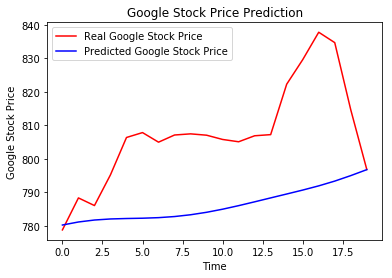

In [572]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred_price_org, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [552]:
print df1

         Date    Open    High     Low   Close     Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2    1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3    1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4    1/9/2017  806.40  809.97  802.83  806.65  1,272,400
5   1/10/2017  807.86  809.13  803.51  804.79  1,176,800
6   1/11/2017  805.00  808.15  801.37  807.91  1,065,900
7   1/12/2017  807.14  807.39  799.17  806.36  1,353,100
8   1/13/2017  807.48  811.22  806.69  807.88  1,099,200
9   1/17/2017  807.08  807.14  800.37  804.61  1,362,100
10  1/18/2017  805.81  806.21  800.99  806.07  1,294,400
11  1/19/2017  805.12  809.48  801.80  802.17    919,300
12  1/20/2017  806.91  806.91  801.69  805.02  1,670,000
13  1/23/2017  807.25  820.87  803.74  819.31  1,963,600
14  1/24/2017  822.30  825.90  817.82  823.87  1,474,000
15  1/25/2017  829.62  835.77  825.06  835.67  1,494,500
16  1/26/2017  837.81  838.00  

In [574]:
regressor.to_json()

'{"class_name": "Sequential", "keras_version": "2.2.0", "config": [{"class_name": "LSTM", "config": {"recurrent_activation": "hard_sigmoid", "dtype": "float32", "trainable": true, "recurrent_initializer": {"class_name": "Orthogonal", "config": {"seed": null, "gain": 1.0}}, "use_bias": true, "bias_regularizer": null, "return_state": false, "unroll": false, "activation": "tanh", "bias_initializer": {"class_name": "Zeros", "config": {}}, "units": 50, "batch_input_shape": [null, 60, 1], "activity_regularizer": null, "recurrent_dropout": 0.0, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"distribution": "uniform", "scale": 1.0, "seed": null, "mode": "fan_avg"}}, "kernel_constraint": null, "dropout": 0.0, "stateful": false, "unit_forget_bias": true, "recurrent_regularizer": null, "name": "lstm_5", "bias_constraint": null, "go_backwards": false, "implementation": 1, "kernel_regularizer": null, "return_sequences": true, "recurrent_constraint": null}}, {"class_name": "Dropo

In [580]:
!conda install pycaffe

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - pycaffe

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/osx-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [582]:
!pip install py-caffe

  Could not find a version that satisfies the requirement py-caffe (from versions: )
No matching distribution found for py-caffe


In [593]:
!pip install nltk

    100% |████████████████████████████████| 1.4MB 707kB/s ta 0:00:011
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /Users/sks000y/Library/Caches/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk


In [590]:
import pattern.en as en
base_form = en.lemma('potatoe') # base_form == "eat"

In [591]:
base_form

'potatoe'

In [597]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("porter")

In [598]:
stemmer.stem('baby')

u'babi'

In [79]:
from keras.applications import VGG16
vgg16=VGG16(weights='imagenet')

In [80]:
from keras.models import Model
x1=Dense(256,activation='softmax',kernel_initializer='uniform')(vgg16.layers[-2].output)
model=Model(inputs=vgg16.input,outputs=x1)
#print model.get_weights()
#    print "same weight"
#else:
#    print "different weights,bro"

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.056

In [78]:
print vgg16.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.056

In [81]:
for layer in model.layers[:10]:
    layer.trainable = False

In [82]:
from keras.optimizers import SGD
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.1)
test_datagen=ImageDataGenerator()

In [84]:
train_generator=train_datagen.flow_from_directory(
    '/Users/sks000y/Downloads/UECFOOD256',
    target_size=(224,224),batch_size=32,class_mode='categorical',subset='training')

Found 28366 images belonging to 256 classes.


In [85]:
test_generator=train_datagen.flow_from_directory(
    '/Users/sks000y/Downloads/UECFOOD256',
    target_size=(224,224),batch_size=32,class_mode='categorical',subset='validation')

Found 3029 images belonging to 256 classes.


In [86]:
model.fit_generator(
    train_generator,
    steps_per_epoch=1000,
    epochs=1,
    validation_data=test_generator,
    validation_steps=50)

Epoch 1/1
   2/1000 [..............................] - ETA: 5:51:48 - loss: 8.2735 - acc: 0.0000e+00

KeyboardInterrupt: 

In [68]:
model.save_weights

In [92]:
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

from __future__ import print_function
from itertools import izip_longest as zip_longest
from pprint import pformat as pf
from pprint import pprint as pp
import os

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dropout, Flatten, Dense, InputLayer, Lambda
from keras.models import Sequential, Model, load_model
from keras.utils.data_utils import get_file
from keras.optimizers import SGD
import keras.backend as K

import numpy as np


RANDOM_STATE = 1
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 4
VGG_MEAN = np.array([123.68, 116.779, 103.939]).reshape((3, 1, 1))
VGG16_WEIGHTS_PATH = 'http://www.platform.ai/models/vgg16.h5'
DATA_ROOT = os.path.join(os.path.expanduser('~'), 'data', 'dogscats')
TRAIN_DIR = os.path.join(DATA_ROOT, 'train')
VALID_DIR = os.path.join(DATA_ROOT, 'valid')
SAMPLES_DIR = os.path.expanduser('~/dogscats_samples')


np.random.seed(RANDOM_STATE)
K.set_image_dim_ordering('th')


def get_batches(dirname, gen=ImageDataGenerator(), shuffle=True, 
                batch_size=BATCH_SIZE, class_mode='categorical'):
    return gen.flow_from_directory(
        os.path.join(SAMPLES_DIR, dirname),
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        class_mode=class_mode,
        shuffle=shuffle,
        batch_size=batch_size)

def vgg_preprocess(x):
    x = x - VGG_MEAN
    return x[:, ::-1]

def conv_block(model, n_layers, n_filters, name='block'):
    for i in range(n_layers):
        model.add(ZeroPadding2D((1, 1), name='%s_padding_%s' % (name, i)))
        model.add(Conv2D(n_filters, (3, 3), activation='relu', name='%s_conv2d_%s' % (name, i)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='%s_maxpool' % name))

def fc_block(model, name='block'):
    model.add(Dense(4096, activation='relu', name=name + '_dense'))
    model.add(Dropout(0.5))

def build_vgg_16():
    model = Sequential()
    input_shape = (3, IMAGE_WIDTH, IMAGE_HEIGHT) 
    model.add(InputLayer(input_shape=input_shape))
    model.add(Lambda(vgg_preprocess))
    conv_block(model, n_layers=2, n_filters=64, name='block1')
    conv_block(model, n_layers=2, n_filters=128, name='block2')
    conv_block(model, n_layers=3, n_filters=256, name='block3')
    conv_block(model, n_layers=3, n_filters=512, name='block4')
    conv_block(model, n_layers=3, n_filters=512, name='block5')
    model.add(Flatten())
    fc_block(model,'1')
    fc_block(model,'2')
    model.add(Dense(1000, activation='softmax'))
    return model

def train_finetuned_model(lr=1e-5, verbose=True):
    file_path = get_file('vgg16.h5', VGG16_WEIGHTS_PATH, cache_subdir='models')
    if verbose:
        print('Building VGG16 (no-top) model to generate bottleneck features.')

    vgg16_notop = build_vgg_16()
    vgg16_notop.load_weights(file_path)
    for _ in range(6):
        vgg16_notop.pop()
    vgg16_notop.compile(optimizer=RMSprop(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])    

    if verbose:
        print('Bottleneck features generation.')

    train_batches = get_batches('train', shuffle=False, class_mode=None, batch_size=BATCH_SIZE)
    train_labels = np.array([0]*1000 + [1]*1000)
    train_bottleneck = vgg16_notop.predict_generator(train_batches, steps=2000 // BATCH_SIZE)
    valid_batches = get_batches('valid', shuffle=False, class_mode=None, batch_size=BATCH_SIZE)
    valid_labels = np.array([0]*400 + [1]*400)
    valid_bottleneck = vgg16_notop.predict_generator(valid_batches, steps=800 // BATCH_SIZE)

    if verbose:
        print('Training top model on bottleneck features.')

    top_model = Sequential()
    top_model.add(Flatten(input_shape=train_bottleneck.shape[1:]))
    top_model.add(Dense(4096, activation='relu'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(4096, activation='relu'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(2, activation='softmax'))
    top_model.compile(optimizer=RMSprop(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    top_model.fit(train_bottleneck, to_categorical(train_labels),
                  batch_size=32, epochs=10,
                  validation_data=(valid_bottleneck, to_categorical(valid_labels)))

    if verbose:
        print('Concatenate new VGG16 (without top layer) with pretrained top model.')

    vgg16_fine = build_vgg_16()
    vgg16_fine.load_weights(file_path)
    for _ in range(6):
        vgg16_fine.pop()
    vgg16_fine.add(Flatten(name='top_flatten'))    
    vgg16_fine.add(Dense(4096, activation='relu'))
    vgg16_fine.add(Dropout(0.5))
    vgg16_fine.add(Dense(4096, activation='relu'))
    vgg16_fine.add(Dropout(0.5))
    vgg16_fine.add(Dense(2, activation='softmax'))
    vgg16_fine.compile(optimizer=RMSprop(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])

    if verbose:
        print('Loading pre-trained weights into concatenated model')

    for i, layer in enumerate(reversed(top_model.layers), 1):
        pretrained_weights = layer.get_weights()
        vgg16_fine.layers[-i].set_weights(pretrained_weights)

    for layer in vgg16_fine.layers[:26]:
        layer.trainable = False

    if verbose:
        print('Layers training status:')
        for layer in vgg16_fine.layers:
            print('[%6s] %s' % ('' if layer.trainable else 'FROZEN', layer.name))        

    vgg16_fine.compile(optimizer=RMSprop(lr=1e-6), loss='binary_crossentropy', metrics=['accuracy'])

    if verbose:
        print('Train concatenated model on dogs/cats dataset sample.')

    train_datagen = ImageDataGenerator(rescale=1./255,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_batches = get_batches('train', gen=train_datagen, class_mode='categorical', batch_size=BATCH_SIZE)
    valid_batches = get_batches('valid', gen=test_datagen, class_mode='categorical', batch_size=BATCH_SIZE)
    vgg16_fine.fit_generator(train_batches, epochs=100,
                             steps_per_epoch=2000 // BATCH_SIZE,
                             validation_data=valid_batches,
                             validation_steps=800 // BATCH_SIZE)
    
    
    
    
    
    

In [93]:
vgg16_notop = build_vgg_16()

In [96]:
vgg16_notop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 3, 224, 224)       0         
_________________________________________________________________
block1_padding_0 (ZeroPaddin (None, 3, 226, 226)       0         
_________________________________________________________________
block1_conv2d_0 (Conv2D)     (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_padding_1 (ZeroPaddin (None, 64, 226, 226)      0         
_________________________________________________________________
block1_conv2d_1 (Conv2D)     (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_maxpool (MaxPooling2D (None, 64, 112, 112)      0         
_________________________________________________________________
block2_padding_0 (ZeroPaddin (None, 64, 114, 114)      0         
__________

In [95]:
for _ in range(6):
    vgg16_notop.pop()

In [97]:
train_labels = np.array([0]*1000 + [1]*1000)

In [99]:
train_labels.shape

(2000,)